In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("/Users/premswaroop/Desktop/jupyter1/Social_Network_Ads.csv")
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [5]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
#removing both gender and user id column
df.drop(['Gender','User ID'],axis='columns',inplace=True)
inputs=df.drop("Purchased",axis='columns')
target=df['Purchased']

In [7]:
inputs.head(5)

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [8]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.33)

In [45]:
len(X_train)

268

In [46]:
len(X_test)

132

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
#using feature transformation
#applying standard scaler seperately for both train and test data
#in order to avoid overfitting we do it seperately
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)

In [49]:
X_train_scaled

array([[-1.0760555 ,  0.54866463],
       [ 0.87247743,  1.12257596],
       [-0.14818268,  0.9413408 ],
       [ 0.13017917,  0.33722362],
       [-1.81835376,  0.4278412 ],
       [-1.16884278, -1.38451035],
       [-1.0760555 ,  0.48825292],
       [-1.16884278,  0.57887049],
       [-0.79769365,  0.45804706],
       [-0.79769365, -0.20648184],
       [ 1.89313754, -1.35430449],
       [ 0.87247743, -0.50854043],
       [ 0.40854102, -0.41792286],
       [-0.42654452, -1.11265762],
       [ 0.22296646,  0.21640018],
       [ 0.22296646, -0.62936387],
       [ 1.15083928,  0.60907635],
       [ 0.87247743, -0.53874629],
       [ 1.80035026, -0.2366877 ],
       [-0.33375724, -0.75018731],
       [-0.89048094,  0.51845878],
       [-0.24096996, -0.20648184],
       [ 0.13017917,  1.99854587],
       [ 1.52198841,  1.21319353],
       [ 1.80035026,  1.63607556],
       [-0.14818268,  0.21640018],
       [ 0.87247743,  1.36422283],
       [-0.05539539, -1.0522459 ],
       [-1.26163007,

In [50]:
X_test_scaled=scaler.transform(X_test)
X_test_scaled

array([[-0.79769365,  0.36742948],
       [ 1.98592483,  2.2703986 ],
       [-0.05539539,  0.2768119 ],
       [-0.24096996, -0.08565841],
       [-0.61211909, -1.02204004],
       [ 0.31575374, -0.47833457],
       [-0.14818268,  1.51525213],
       [-0.24096996, -0.387717  ],
       [-0.24096996,  0.69969393],
       [-1.0760555 , -1.08245176],
       [-0.24096996, -0.32730528],
       [-0.24096996,  0.60907635],
       [ 0.40854102,  0.66948807],
       [-1.35441735, -0.05545255],
       [-1.35441735, -0.59915801],
       [-0.98326822,  2.08916345],
       [-0.79769365,  0.45804706],
       [-0.61211909, -0.05545255],
       [ 0.31575374,  0.33722362],
       [ 0.31575374,  0.12578261],
       [ 1.33641385,  2.11936931],
       [-0.05539539,  2.08916345],
       [-0.98326822,  0.48825292],
       [-1.6327792 , -0.56895215],
       [-0.61211909, -0.29709942],
       [ 1.42920113,  0.4278412 ],
       [ 0.96526472,  1.99854587],
       [-0.98326822, -0.29709942],
       [-0.05539539,

In [51]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=50)
model.fit(X_train_scaled,y_train)

RandomForestClassifier(n_estimators=50)

In [43]:
#this is the accuracy we got after applying standardscaler
#test size =0.2
model.score(X_test_scaled,y_test)

0.90625

In [52]:
#this is the score we got after increasing test size=0.33
#with standardscaler
#n_estimators=50
model.score(X_test_scaled,y_test)

0.9090909090909091

In [53]:
#we see that after removing gender column we are getting more accuracy 
#in random_forest file  we can see accuracy with gender column is around 87%

In [54]:
y_predicted=model.predict(X_test_scaled)

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
#here in confusion matrix we first supply our truth then supply our prediction
#cm=confusion_matrix(truth,prediction)
cm=confusion_matrix(y_test,y_predicted)
cm

array([[78,  6],
       [ 6, 42]])

Text(69.0, 0.5, 'Truth')

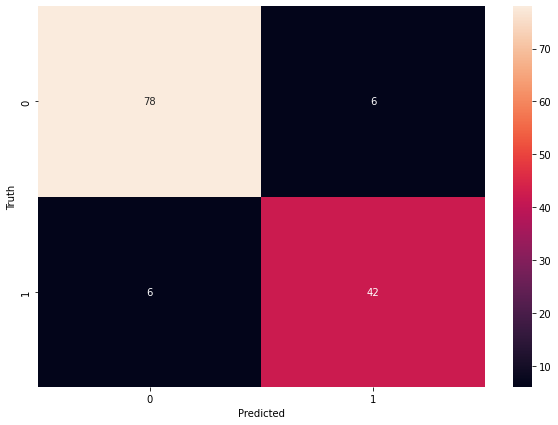

In [63]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")